In [2]:
from sklearn.datasets import make_blobs #This function is used to generate synthetic datasets of blob-shaped clusters.
# from sklearn.datasets import make_blobs
import numpy as np  #simply import the NumPy library
import matplotlib.pyplot as plt # used for data visulations
import math # to access a library of mathematical functions that are not built into the core Python language.

In [3]:
#use for the purpose of generating a dataset consisting of blobs (clusters) that can be employed in machine learning tasks.
def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]

    return points,centers

In [4]:
#The provided Python function draw_plot(points, centers, label=True) is designed to visualize a dataset using a scatter plot.
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()



In [5]:
#The function plot_centroids(centers) focuses specifically on visualizing the centroids (cluster centers) of a dataset.

def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [6]:
#This function, likely for k-means clustering, initializes the centroids (cluster centers).

def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [7]:
#The function get_distance(p1, p2) calculates the Euclidean distance between two points p1and p2 in a n-dimensional space.
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [8]:
#The function find_nearest_neighbour(points, centroids) identifies the closest centroid (cluster center) for each data point in a dataset.
def find_nearest_neighbour(points,centroids):

    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)

    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):

            temp_dis = get_distance(points[i,:],centroids[j,:])

            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind

    return centers

In [9]:
#The function find_centroids(points, centers) recalculates the centroids (cluster centers) based on the current assignment of data points to those centroids.
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
    print(k)
    centroids = np.zeros([k,2])

    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])

    return centroids

In [10]:
#This function preprocesses a dataset (points) likely for machine learning purposes.
def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x

    return points

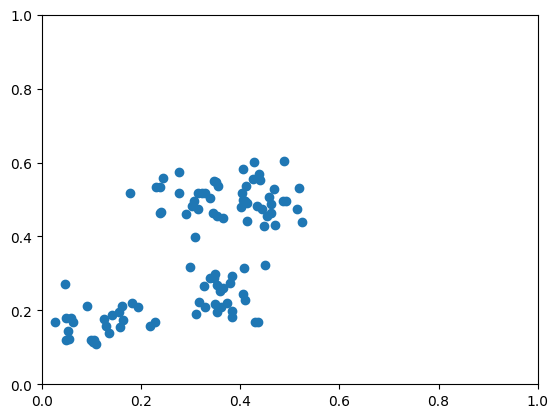

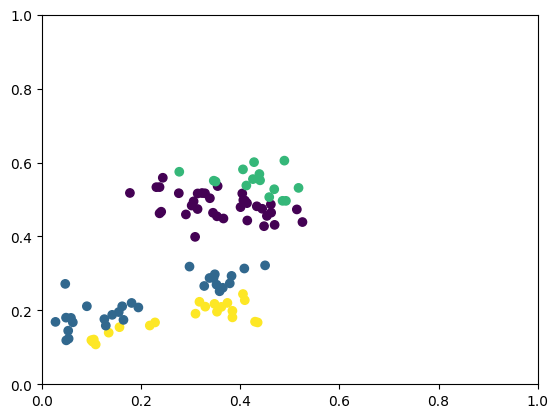

4


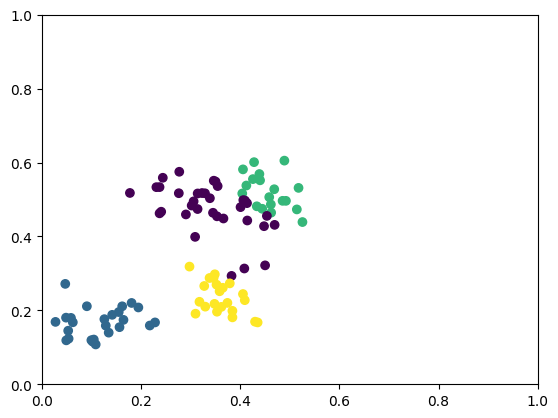

4


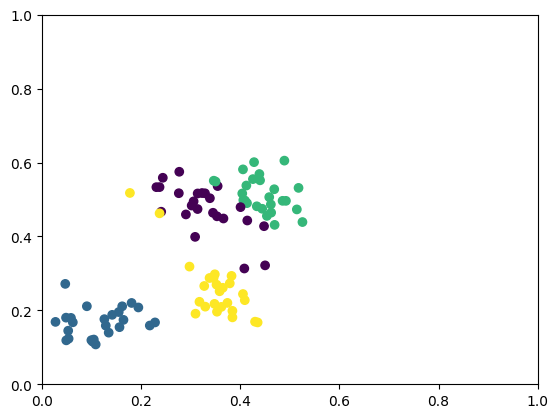

4


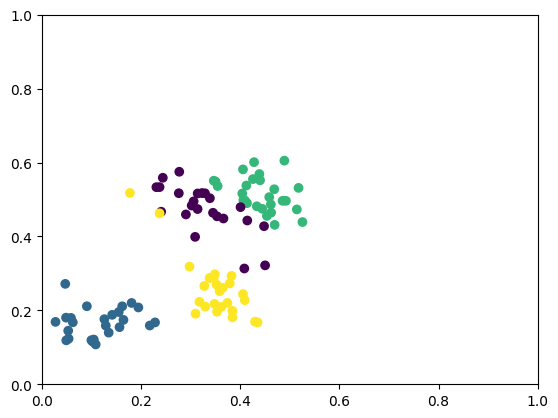

4


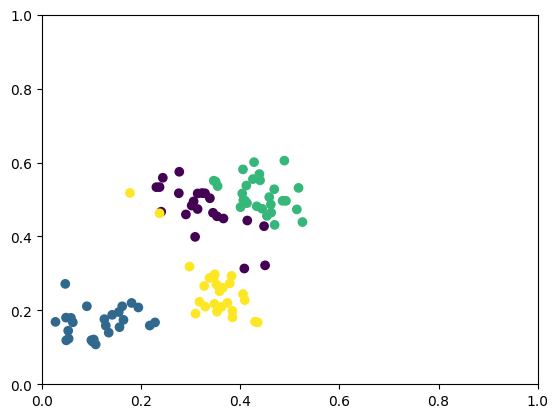

4


In [11]:
n = 100    # number of data points
k = 4        # Number of centers
std = 2      # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset

points = preprocess(points)                # Normalize dataset
plt.figure()
draw_plot(points,o_centers,label=False)

centroids = initialize_centers(points,k)   # Intialize centroids


# run k-means algorithm
for i in range(5):

    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids = find_centroids(points,centers)               # find centroids